# Neural - Network
- Import Module
- read csv file

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import backtest as bt
from matplotlib import pyplot as plt

predictcsv = "nn_201709_201809.csv"
df = pd.read_csv(predictcsv, index_col = 0, encoding='utf-8')
# print(df.columns)

### 데이터 전처리
- 빠른 연산을 위해 필요한 column만 선택
- 결측치가 많은 게임은 제외
- 게임별로 group을 나눔

In [2]:
col_list = ['rank','prediction','dandivi','yeondivi','groupid']
groupid = 'groupid'
data, gb_data, total_data = bt.getData(df, col_list, groupid, min_size=10)

## 단승식 정액 베팅
- predict 특정 값 이상일 때만 베팅
- minimum predict를 0, 0.5, 0.6, 0.7로 설정
- 까다롭게 설정할수록 맞출 확률이 높다
- 켈리베팅을 위해 minimum predict별 정답률 측정!

---
1. predict 0.0 ~ 0.5 : 13.7% : 51개 중 7개
2. predict 0.5 ~ 0.6 : 32.7% : 202개 중 66개
3. predict 0.6 ~ 0.7 : 38.8% : 98개 중 38개
4. predict 0.7 ~ 1.0 : 49.4% : 77개 중 38개

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0
베팅한 게임: 428
예측 성공한 게임: 149
최종 금액: 1494000.0


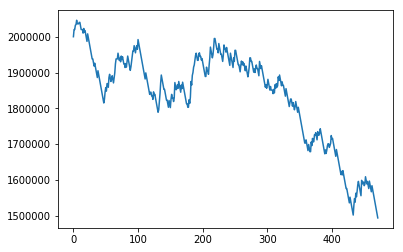

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.5
베팅한 게임: 377
예측 성공한 게임: 142
최종 금액: 1692000.0


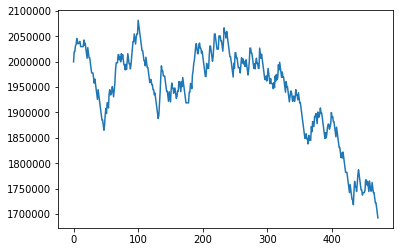

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.6
베팅한 게임: 175
예측 성공한 게임: 76
최종 금액: 1763000.0


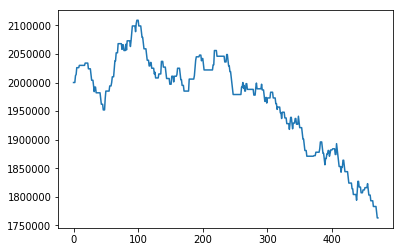

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.7
베팅한 게임: 77
예측 성공한 게임: 38
최종 금액: 1869000.0


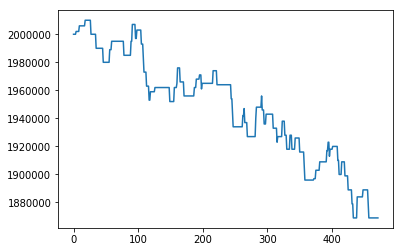

In [3]:
betting_money = 10000
start_money = 2000000
for p in [0, 0.5, 0.6, 0.7]:
    ongoing, cnt, get, moneylist = bt.dan_bet(betting_money, start_money,total_data,\
                                             'prediction',min_pred=p)

    print('파일 크기:',len(data))
    print('전체 게임:',len(gb_data))
    print('테스트 게임:',len(total_data))
    print('prediction 최소:',p)
    print('베팅한 게임:',cnt)
    print('예측 성공한 게임:',get)
    print('최종 금액:',moneylist[-1])

    %matplotlib inline
    plt.plot(moneylist)
    plt.show()


## 연승식 정액 베팅
- predict이 특정 값 이상일 때만 베팅
- minimum predict를 0, 0.5, 0.6, 0.7로 설정
- 까다롭게 설정할수록 맞출 확률이 높다
- 켈리베팅을 위해 minimum predict별 정답률 측정!

---
1. predict 0.0 ~ 0.5 : 47.4% : 38개 중 18개
2. predict 0.5 ~ 0.6 : 63.3% : 172개 중 109개 
3. predict 0.6 ~ 0.7 : 73.3% : 86개 중 63개 
4. predict 0.7 ~ 1.0 : 77.6% : 67개 중 52개 

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0
베팅한 게임: 363
예측 성공한 게임: 242
최종 금액: 1597000.0


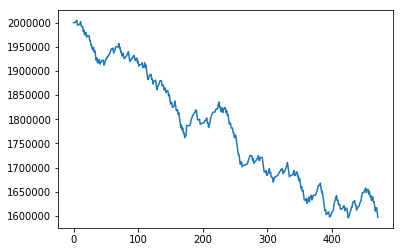

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.5
베팅한 게임: 325
예측 성공한 게임: 224
최종 금액: 1638000.0


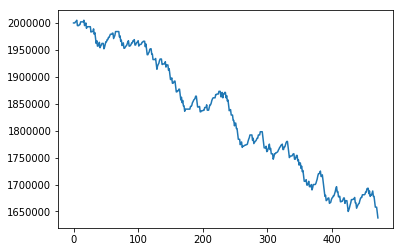

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.6
베팅한 게임: 153
예측 성공한 게임: 115
최종 금액: 1830000.0


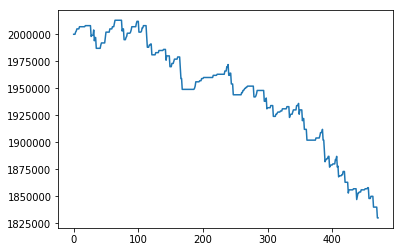

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
prediction 최소: 0.7
베팅한 게임: 67
예측 성공한 게임: 52
최종 금액: 1917000.0


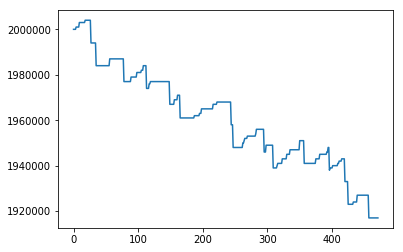

In [4]:
for p in [0, 0.5, 0.6, 0.7]:
    ongoing, cnt, get, moneylist = bt.yeon_bet(betting_money, start_money,total_data,\
                                             'prediction',min_pred=p)

    print('파일 크기:',len(data))
    print('전체 게임:',len(gb_data))
    print('테스트 게임:',len(total_data))
    print('prediction 최소:',p)
    print('베팅한 게임:',cnt)
    print('예측 성공한 게임:',get)
    print('최종 금액:',moneylist[-1])

    %matplotlib inline
    from matplotlib import pyplot as plt
    plt.plot(moneylist)
    plt.show()


## 켈리 베팅 단승
- 배당률이 높고, 정보 우위가 확실할 때 베팅!

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
베팅한 게임: 146
예측 성공한 게임: 40
최종 금액: 215657.35009404915


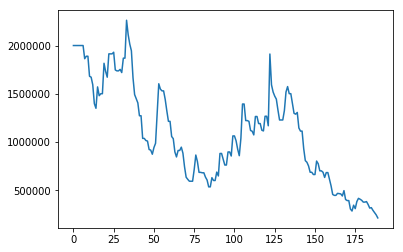

In [5]:
ongoing, cnt, get, moneylist = bt.kelly_nn_dan_bet(betting_money, start_money,total_data,\
                                            'prediction',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 켈리 베팅 단승 
- prediction 상위 3개 말 모두 betting 가능성 열어둔다.


파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
베팅한 게임: 904
예측 성공한 게임: 148
최종 금액: 1.5501297838804798e-43


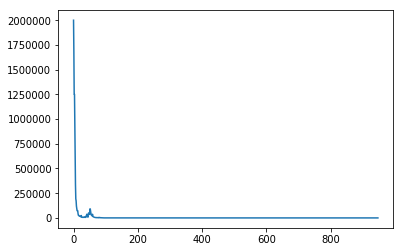

In [6]:
ongoing, cnt, get, moneylist = bt.kelly_nn_dan3_bet(betting_money, start_money,total_data,\
                                            'prediction',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 켈리 베팅 연승

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
베팅한 게임: 77
예측 성공한 게임: 16
최종 금액: 39930.55603178954


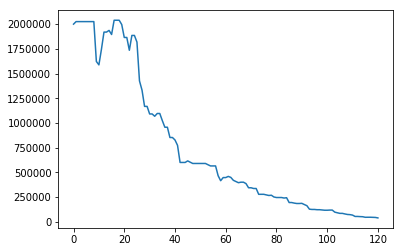

In [7]:
ongoing, cnt, get, moneylist = bt.kelly_nn_yeon_bet(betting_money, start_money,total_data,\
                                            'prediction',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()


## 켈리 베팅 연승
- prediction 상위 3개 말 모두 check

파일 크기: 9337
전체 게임: 1088
테스트 게임: 471
베팅한 게임: 19
예측 성공한 게임: 1
최종 금액: 1113349.9952173133


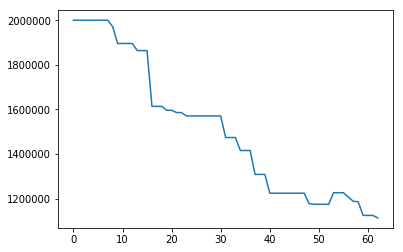

In [8]:
ongoing, cnt, get, moneylist = bt.kelly_nn_yeon3_bet(betting_money, start_money,total_data,\
                                            'prediction',min_pred=0)
print('파일 크기:',len(data))
print('전체 게임:',len(gb_data))
print('테스트 게임:',len(total_data))
print('베팅한 게임:',cnt)
print('예측 성공한 게임:',get)
print('최종 금액:',moneylist[-1])

%matplotlib inline
plt.plot(moneylist)
plt.show()
